<font color=red size=6>**Estados Excitados**

<font color=red>**Prof. Enrique Mejía Ospino, emejia@uis.edu.co**

<font color=red>**Escuela de Química**
    
<font color=red>**Universidad Industrial de Santander** 

**<font color=blue> Vamos  atilizar el modulo *Pyscf* para desarrollar algunos ejercicios de cálculo mecánico-cuántico. En este Cuaderno de Jupyter se muestra como obtener los estados excitados de sistemas moleculares, para ello se utilizará el método de cálculo *TDDFT* (DFT dependiente del tiempo). Este método es uno de los más utilizados para el análisis de los estados excitados que permitirá predecir el espectro de absorción *UV-VIS* y espectros de *Fluorescencia*.  El análisis nos da las diferencias de energía y entre el estado fundamental y los estados excitados y adicionalmente la probabilidad de transición como fuerza del oscilador (*oscillator strength*).** 

In [1]:
from ase.units import Ry, eV, Ha
import pyscf
from pyscf import gto, dft, tddft, tdscf
from ase import Atoms
import numpy as np
import matplotlib.pyplot as plt
import fortecubeview # Visualizar moléculas

In [2]:
fortecubeview.plot(width=500,height=300,colorscheme='emory',sumlevel=0.75)

CubeViewer: listing cube files from the directory .
load_cubes: no cube files found in directory .
CubeViewer: no cube files provided. The widget will not be displayed


In [3]:
xyz = """
O                     0.000000000000     0.000000000000    -0.065775570547
H                     0.000000000000    -0.759061990794     0.521953018286
H                     0.000000000000     0.759061990794     0.521953018286
"""

fortecubeview.geom(xyz = xyz)

Renderer(camera=OrthographicCamera(bottom=-5.0, children=(DirectionalLight(color='white', intensity=0.5, posit…

**<font color=blue> Este de abajo es un cálculo sencillo en el que se usa una base *6-31g*, se realiza el cálculo *dft* con el funcional *b3lyp*. Se obtienen 3 estados excitados de acuerdo en lo indicado en la función *nto* y sus los valores de energía.** 

In [4]:
from pyscf import gto, dft, tddft

mol = gto.Mole()
mol.build(
    atom = '''
      o     0    0       0
      h     0    -.757   .587
      h     0    .757    .587''',  # in Angstrom
    basis = '631g',
    symmetry = True,
)

mf = dft.RKS(mol)
mf.xc = 'b3lyp'
mf.kernel()

mytd = tddft.TDDFT(mf)
mytd.kernel()

weights_1, nto_1 = mytd.get_nto(state=1, verbose=4)
weights_2, nto_2 = mytd.get_nto(state=2, verbose=4)
weights_3, nto_3 = mytd.get_nto(state=3, verbose=4)

from pyscf.tools import molden
molden.from_mo(mol, 'nto-td-3.molden', nto_3)

converged SCF energy = -76.347810766126
Excited State energies (eV)
[7.80914054 9.91154603 9.94779907]
State 1: 7.80914 eV  NTO largest component 0.999883058942889
    occ-NTO: 1.000000 (MO #5)
    vir-NTO: 0.999752 (MO #6)
State 2: 9.91155 eV  NTO largest component 0.9864484409529908
    occ-NTO: 0.999699 (MO #4)
    vir-NTO: 0.999874 (MO #6)
State 3: 9.9478 eV  NTO largest component 0.9999916586770479
    occ-NTO: 1.000000 (MO #5)
    vir-NTO: 0.999432 (MO #7)


**<font color=blue> Este es otra opción en la que obtenemos 10 estados con sus respectivas simetrías y su intensidad (oscillator strength).** 

In [5]:
from pyscf import gto, scf, dft, tddft

mol = gto.Mole()
mol.build(
    atom = '''
      o     0    0       0
      h     0    -.757   .587
      h     0    .757    .587''',  # in Angstrom
    basis = '631g',
    symmetry = True,
)

mf = dft.RKS(mol)
mf.xc = 'b3lyp'
mf.kernel()

mytd = tddft.TDDFT(mf)
mytd.nstates = 10
mytd.kernel()
mytd.analyze()

# PySCF-1.6.1 and newer supports the .TDDFT method to create a TDDFT
# object after importing tdscf module.
from pyscf import tddft
#mytd = mf.TDDFT().run()
#mytd = mol.RHF().run().TDHF().run()

converged SCF energy = -76.347810766126
Excited State energies (eV)
[ 7.80914054  9.91154601  9.94779907 12.37308116 14.75039315 18.18007294
 27.76941228 28.14881774 29.14720826 30.09284831]

** Singlet excitation energies and oscillator strengths **
Excited State   1:   B2      7.80914 eV    158.77 nm  f=0.0115
Excited State   2:   A1      9.91155 eV    125.09 nm  f=0.0962
Excited State   3:   A2      9.94780 eV    124.63 nm  f=0.0000
Excited State   4:   B1     12.37308 eV    100.20 nm  f=0.0870
Excited State   5:   B1     14.75039 eV     84.05 nm  f=0.4120
Excited State   6:   A1     18.18007 eV     68.20 nm  f=0.2413
Excited State   7:   A2     27.76941 eV     44.65 nm  f=0.0000
Excited State   8:   A1     28.14882 eV     44.05 nm  f=0.0167
Excited State   9:   B2     29.14721 eV     42.54 nm  f=0.0869
Excited State  10:   B1     30.09285 eV     41.20 nm  f=0.1475


**<font color=blue> Similar al anterior script.** 

In [13]:
from pyscf import gto, scf, dft, tddft

mol = gto.Mole()
mol.build(
    atom = '''
      o     0    0       0
      h     0    -.757   .587
      h     0    .757    .587''',  # in Angstrom
    basis = '631g',
    symmetry = True,
)

mf = dft.RKS(mol)
mf.xc = 'b3lyp'
mf.kernel() # Calcula energía del estado fundamental 

mytd = mf.TDDFT().run() # Calcula los estados excitados 

mytd.nstates = 10
mytd.kernel()
mytd.analyze()

converged SCF energy = -76.3478107661261
Excited State energies (eV)
[7.80914054 9.91154603 9.94779907]
Excited State energies (eV)
[ 7.80914054  9.91154601  9.94779907 12.37308116 14.75039315 18.18007294
 27.76941228 28.14881774 29.14720826 30.09284831]

** Singlet excitation energies and oscillator strengths **
Excited State   1:   B2      7.80914 eV    158.77 nm  f=0.0115
Excited State   2:   A1      9.91155 eV    125.09 nm  f=0.0962
Excited State   3:   A2      9.94780 eV    124.63 nm  f=0.0000
Excited State   4:   B1     12.37308 eV    100.20 nm  f=0.0870
Excited State   5:   B1     14.75039 eV     84.05 nm  f=0.4120
Excited State   6:   A1     18.18007 eV     68.20 nm  f=0.2413
Excited State   7:   A2     27.76941 eV     44.65 nm  f=0.0000
Excited State   8:   A1     28.14882 eV     44.05 nm  f=0.0167
Excited State   9:   B2     29.14721 eV     42.54 nm  f=0.0869
Excited State  10:   B1     30.09285 eV     41.20 nm  f=0.1475


**<font color=blue> Similar al anterior script, un poco más sencillo, se utiliza la determinación de la energía del estado fundamental usando RHF.** 

In [15]:
mol = gto.Mole()
mol.build(
    atom = '''
      o     0    0       0
      h     0    -.757   .587
      h     0    .757    .587''',  # in Angstrom
    basis = '631g',
    symmetry = True,
)
mytd = mol.RHF().run().TDHF().run() # Calcula energía del estado fundamental usando el métod RHF y los estados excitados en
# una sola línea

#mytd = mf.TDDFT().run() # Calcula los estados excitados 

mytd.nstates = 10
mytd.kernel()
mytd.analyze()

converged SCF energy = -75.9839484981055
Excited State energies (eV)
[ 9.36273381 11.28221712 11.78434553]
Excited State energies (eV)
[ 9.36273381 11.28221712 11.78434554 13.85939254 15.47459866 19.10080506
 30.71639446 30.80765858 31.41780461 32.07833016]

** Singlet excitation energies and oscillator strengths **
Excited State   1:   B2      9.36273 eV    132.42 nm  f=0.0145
Excited State   2:   A2     11.28222 eV    109.89 nm  f=0.0000
Excited State   3:   A1     11.78435 eV    105.21 nm  f=0.1126
Excited State   4:   B1     13.85939 eV     89.46 nm  f=0.0970
Excited State   5:   B1     15.47460 eV     80.12 nm  f=0.4419
Excited State   6:   A1     19.10081 eV     64.91 nm  f=0.2685
Excited State   7:   B2     30.71639 eV     40.36 nm  f=0.0641
Excited State   8:   A2     30.80766 eV     40.24 nm  f=0.0000
Excited State   9:   A1     31.41780 eV     39.46 nm  f=0.0106
Excited State  10:   B2     32.07833 eV     38.65 nm  f=0.0045


In [68]:
from pyscf import gto, scf, dft, tddft
import pandas as pd
mol = gto.Mole()
mol.build(
    atom = '''
      o     0    0       0
      h     0    -.757   .587
      h     0    .757    .587''',  # in Angstrom
    basis = '631g',
    symmetry = True,
)

mf = mol.RKS()
mf.xc= 'camb3lyp'
mf.run()

# Note you need to switch to xcfun library for cam-b3lyp tddft
mf._numint.libxc = pyscf.dft.xcfun
mytd = mf.TDDFT()

mytd.nstates = 10
mytd.kernel()
mytd.analyze()
mytd.oscillator_strength(gauge='length')
#mytd.transition_dipole()
#mytd.oscillator_strength(gauge='velocity')
#print(list(mytd.analyze(verbose=4)[1]))
F = mytd.oscillator_strength(gauge='length') # Oscilator stregth (f)
LO = mytd.kernel()[0]*27.211385 # Diferencia de energía en eV
ESP = pd.DataFrame([LO, F]).T # Espectros UV-VIS
ESP.set_axis(['Energy (eV)', 'Int (Osc. strength)]'], axis=1, inplace=True)
ESP.to_csv('./Data/esp_uv-vis1.csv')

converged SCF energy = -76.3554935000354
Excited State energies (eV)
[ 7.90669935 10.01488148 10.08746356 12.53394723 14.79181987 18.32040498
 27.99990594 28.40056132 29.31788336 30.37368889]

** Singlet excitation energies and oscillator strengths **
Excited State   1:   B2      7.90670 eV    156.81 nm  f=0.0113
Excited State   2:   A1     10.01488 eV    123.80 nm  f=0.0943
Excited State   3:   A2     10.08746 eV    122.91 nm  f=0.0000
Excited State   4:   B1     12.53395 eV     98.92 nm  f=0.0833
Excited State   5:   B1     14.79182 eV     83.82 nm  f=0.4130
Excited State   6:   A1     18.32040 eV     67.68 nm  f=0.2443
Excited State   7:   A2     27.99991 eV     44.28 nm  f=0.0000
Excited State   8:   A1     28.40056 eV     43.66 nm  f=0.0145
Excited State   9:   B2     29.31788 eV     42.29 nm  f=0.0827
Excited State  10:   B1     30.37369 eV     40.82 nm  f=0.1574
Excited State energies (eV)
[ 7.90669935 10.01488148 10.08746356 12.53394723 14.79181987 18.32040498
 27.99990594 28.4

In [69]:
ESP

,Energy (eV),Int (Osc. strength)]
0,7.906699,1.129689e-02
1,10.014881,9.427359e-02
2,10.087463,9.147131e-27
3,12.533947,8.334956e-02
4,14.791819,4.130328e-01
5,18.320404,2.442812e-01
6,27.999905,6.185764e-30
7,28.400560,1.447519e-02
8,29.317882,8.269818e-02
9,30.373688,1.574047e-01


**<font color=blue> Aqui usamos CIS para determinar los estados excitados con amplitudes TDA.** 

In [22]:
from pyscf import gto, scf, dft, tddft

mol = gto.Mole()
mol.build(
    atom = '''
      o     0    0       0
      h     0    -.757   .587
      h     0    .757    .587''',  # in Angstrom
    basis = '631g',
    symmetry = True,
)

mf = dft.RKS(mol)
mf.xc = 'b3lyp'
mf.kernel()

mytd = tdscf.TDA(mf).run(nstates=5)
mytd.analyze()

def tda_denisty_matrix(td, state_id):
    '''
    Taking the TDA amplitudes as the CIS coefficients, calculate the density
    matrix (in AO basis) of the excited states
    '''
    cis_t1 = td.xy[state_id][0]
    dm_oo =-np.einsum('ia,ka->ik', cis_t1.conj(), cis_t1)
    dm_vv = np.einsum('ia,ic->ac', cis_t1, cis_t1.conj())

    # The ground state density matrix in mo_basis
    mf = td._scf
    dm = np.diag(mf.mo_occ)

    # Add CIS contribution
    nocc = cis_t1.shape[0]
    # Note that dm_oo and dm_vv correspond to spin-up contribution. "*2" to
    # include the spin-down contribution
    dm[:nocc,:nocc] += dm_oo * 2
    dm[nocc:,nocc:] += dm_vv * 2

    # Transform density matrix to AO basis
    mo = mf.mo_coeff
    dm = np.einsum('pi,ij,qj->pq', mo, dm, mo.conj())
    return dm

# Density matrix for the 3rd excited state
dm = tda_denisty_matrix(mytd, 2)

# Write to cube format
from pyscf.tools import cubegen
cubegen.density(mol, 'tda_density.cube', dm)

# Write the difference between excited state and ground state
cubegen.density(mol, 'density_diff.cube', dm-mf.make_rdm1())

# The positive and negative parts can be overlayed in Jmol
# isosurface ID "surf1" cutoff  0.02 density_diff.cube
# isosurface ID "surf2" cutoff -0.02 density_diff.cube

converged SCF energy = -76.3478107661261
Excited State energies (eV)
[ 7.83052765  9.9525412   9.99282323 12.42949018 14.81753494]

** Singlet excitation energies and oscillator strengths **
Excited State   1:   B2      7.83053 eV    158.33 nm  f=0.0122
Excited State   2:   A2      9.95254 eV    124.58 nm  f=0.0000
Excited State   3:   A1      9.99282 eV    124.07 nm  f=0.1059
Excited State   4:   B1     12.42949 eV     99.75 nm  f=0.0952
Excited State   5:   B1     14.81753 eV     83.67 nm  f=0.4671


array([[[3.85942630e-07, 4.88077720e-07, 6.13969195e-07, ...,
         6.75515889e-06, 5.72228926e-06, 4.82195197e-06],
        [4.80397538e-07, 6.07411020e-07, 7.63922695e-07, ...,
         8.38172159e-06, 7.10061587e-06, 5.98377920e-06],
        [5.93545598e-07, 7.50308082e-07, 9.43414671e-07, ...,
         1.03186030e-05, 8.74211299e-06, 7.36760435e-06],
        ...,
        [5.93545598e-07, 7.50308082e-07, 9.43414671e-07, ...,
         1.03186030e-05, 8.74211299e-06, 7.36760435e-06],
        [4.80397538e-07, 6.07411020e-07, 7.63922695e-07, ...,
         8.38172159e-06, 7.10061587e-06, 5.98377920e-06],
        [3.85942630e-07, 4.88077720e-07, 6.13969195e-07, ...,
         6.75515889e-06, 5.72228926e-06, 4.82195197e-06]],

       [[4.46539238e-07, 5.64677825e-07, 7.10282775e-07, ...,
         7.80854741e-06, 6.61474236e-06, 5.57408819e-06],
        [5.55885360e-07, 7.02809835e-07, 8.83838771e-07, ...,
         9.68840207e-06, 8.20776309e-06, 6.91693204e-06],
        [6.86896307e-07, 

**<font color=blue> Comparando dos funcionales.** 

In [25]:
import copy
from pyscf import gto, dft, tddft

mol = gto.M(atom = '''
      o     0    0       0
      h     0    -.757   .587
      h     0    .757    .587''',  # in Angstrom
    basis = '631g*',
    symmetry = True,
)


mf = dft.RKS(mol).run(xc='pbe0')

#
# A common change for TDDFT is to use different XC functional library.  For
# example, PBE0 is not supported by the default XC library (libxc) in the TDDFT
# calculation.  Changing to xcfun library for TDDFT can solve this problem
#
mf._numint.libxc = dft.xcfun
# PySCF-1.6.1 and newer supports the .TDDFT method to create a TDDFT
# object after importing tdscf module.
td = mf.TDDFT()
print(td.kernel()[0] * 27.2114)

#
# Overwriting the relevant attributes of the ground state mf object,
# the TDDFT calculations can be run with different XC, grids.
#
mf.xc = 'lda,vwn'
mf.grids.set(level=2).kernel(with_non0tab=True)
td = mf.TDDFT()
print(td.kernel()[0] * 27.2114)

#
# Overwriting the ground state SCF object is unsafe.  A better solution is to
# create a new fake SCF object to hold different XC, grids parameters.
#
from pyscf.dft import numint
mf = dft.RKS(mol).run(xc='pbe0')
mf1 = copy.copy(mf)
mf1.xc = 'lda,vwn'
mf1.grids = dft.Grids(mol)
mf1.grids.level = 2
mf1._numint = numint.NumInt()
mf1._numint.libxc = dft.xcfun
td = mf1.TDDFT()
print(td.kernel()[0] * 27.2114)


converged SCF energy = -76.3238441273011
Excited State energies (eV)
[ 8.40219954 10.40170929 10.92823644]
[ 8.40220385 10.40171464 10.92824206]
Excited State energies (eV)
[10.97713746 13.11294174 13.34875981]
[10.9771431  13.11294848 13.34876667]
converged SCF energy = -76.3238441273012
Excited State energies (eV)
[10.97713746 13.11294174 13.34875981]
[10.9771431  13.11294848 13.34876667]


In [1]:
#%%
# Import modules =======================================================
import psi4
import numpy as np  
import pandas as pd

In [2]:
# Set up Psi4 ==========================================================

psi4.core.clean()
psi4.core.clean_options()
psi4.set_memory('4000 MB')  # Can make this much larger on Seawulf, each compute node has more than 100 GB RAM
psi4.set_num_threads(4)    # Can make this much larger on Seawulf, each compute node can support 28 threads.
                            # But it doesn't help much for small molecules...
psi4.core.set_output_file('./Data/PotentialScan.dat', False) #this command sets psi4's output to a file. Comment this line out if you want to see the output on the terminal.

In [3]:
# Define QC method to use and set up calculation =======================

method = 'eom-ccsd/aug-cc-pvdz'

#Define Z-matrix string with adjustable bond length
OHstring = """
O
H 1 {0}
"""
# Do initial molecule initialization in order to extract the irreps.
OH = psi4.geometry(OHstring.format(2)) 
irreps = OH.irrep_labels()

# Set up vector with number of roots to find per irreducible representation
# ------------[A1, A2, B1  B2] 
RootsVector = [ 2,  2,  2,  0]
Nroots = np.sum(RootsVector)

# Set up open-shell calculation options. If having trouble converging, you
# can try a uhf referncer or change the method for guessing the starting point
# for the reference scf calculation d 
psi4.set_options({'reference': 'rohf', 'freeze_core':'true', \
                  'roots_per_irrep':RootsVector, 'guess':'read'}) #Only need A1

# Set up internuclear distances to scan.
Rvals = [0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.5,1.7,1.9,2.1,2.3,2.5,3.0]

# %%
# Do calculation! ======================================================

# Set up empty 2D array to store the excited state energies and empty 1D
# list to store the ground state energy and the state labels.
Ee = np.zeros( (len(Rvals),Nroots) )
Eg0 = []
Labels = []

i = 0 #loop counter
# loop over internuclear distance
for R in Rvals:
    n = 0
    OH = psi4.geometry(OHstring.format(R)) #set internuclear distance
    print('Working on R = ' + str(R))
    psi4.energy(method, molecule = OH) # perform calculation.
    Eg0.append(psi4.core.variable('CCSD TOTAL ENERGY'))  #append ground state energy to list.   
    print('Ground State Energy = ' + str(Eg0[-1]))
     #loop through excited states
    for n in range(Nroots):
        Labels.append('CC Root ' + str(n+1)) # Append state label, could get more descriptive here.
        Ee[i,n] = psi4.core.variable('CC ROOT %d TOTAL ENERGY' %(n+1)) #store excited state enegies to 2D array
        #print('Excited States Energy = ' + str(Ee[:,n]))
    i += 1

# %%
# Save Data for potential scan =========================================

#Build dictionary to save with Pandas
D = {'R [Angstrom]': Rvals,'Eg': Eg0}
for n in range(Nroots):
    D[Labels[n]] = Ee[:,n]
        
# Save data        
df = pd.DataFrame(data = D) 
df.to_csv('OHpotentials.csv')

# %%
# Calculate energies and dipoles  near equilibrium geometry of the =====
# lowest excited A1 (\Sigma^+) state. ==================================
print('Potential Scan Done, Calculating States and Transition Dipoles at Equilibrium...')
OH = psi4.geometry(OHstring.format(1.0)) # set geometry near A1 state equilibrium.

psi4.core.set_output_file('EquilibriumSpectrum.dat') # change output file name.
psi4.energy(method, molecule = OH)         # calculate energy (put results in new output file).

psi4.core.set_output_file('OscStrength.dat', False) # change output file name to store osc. strength data.
psi4.properties(method, molecule = OH, properties= ['oscillator_strength']) # calculate oscillator strengths.

Working on R = 0.7
Ground State Energy = -75.43910077112201
Working on R = 0.8
Ground State Energy = -75.53700521805658
Working on R = 0.9
Ground State Energy = -75.57419311105323
Working on R = 1.0
Ground State Energy = -75.5802023888392
Working on R = 1.1
Ground State Energy = -75.57056174995475
Working on R = 1.2
Ground State Energy = -75.55361325769285
Working on R = 1.3
Ground State Energy = -75.53386440462627
Working on R = 1.5
Ground State Energy = -75.4947260662294
Working on R = 1.7
Ground State Energy = -75.46235027636324
Working on R = 1.9
Ground State Energy = -75.43925290030866
Working on R = 2.1
Ground State Energy = -75.42607046005062
Working on R = 2.3
Ground State Energy = -75.42167683100537
Working on R = 2.5
Ground State Energy = -75.4212100529538
Working on R = 3.0
Ground State Energy = -75.4219884192551
Potential Scan Done, Calculating States and Transition Dipoles at Equilibrium...


-75.16534920454069

In [8]:
print(psi4.properties(method, molecule = OH, properties = ['oscillator_strength']))

-75.16534920460293


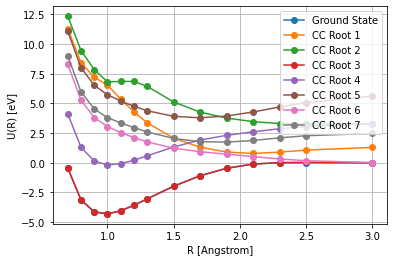

In [73]:
# Import modules =======================================================

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#%%
# Read in data =========================================================
df = pd.read_csv('OHpotentials.csv')
Nroots = len(df.keys()) - 3
Labels = df.keys()[2:]

# %%
# Unpack data into numpy arrays and subtract offset ====================
R = np.asarray(df['R [Angstrom]'])
Eg = np.asarray(df['Eg'])

# subtract dissociation limit for ground state
Eg0au = Eg[-1]
Eg = 27.211399*(Eg-Eg0au)


fig = plt.figure()
ax = plt.axes()
ax.plot(R,Eg, marker = 'o', label = 'Ground State')
for j in range(Nroots):
    Ejvec = np.asarray(df[df.keys()[3+j]]) #unpack excited states
    Ejvec = 27.211399*(Ejvec-Eg0au)
    ax.plot(R,Ejvec, marker = 'o', label = Labels[j+1])
ax.set_xlabel('R [Angstrom]')
ax.set_ylabel('U(R) [eV]')
ax.grid()
ax.legend()
plt.show()

In [17]:
Ee[:,2]

array([-75.27129214, -75.37427946, -75.41689014, -75.42862084,
       -75.42492638, -75.41406025, -75.40042984, -75.37320882,
       -75.35171164, -75.33706706, -75.32623855, -75.31675704,
       -75.30981882, -75.30212021])